<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/08_Implementation_Computational_Complexity_Perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08 Implementation:  Computational Complexity Perspective


This section focuses on the computational complexity of the Perceptron algorithm and how it compares to more complex models like Support Vector Machines (SVMs), Decision Trees, and Deep Neural Networks (DNNs). We'll analyze how the computational cost grows with the size of the dataset and discuss the impact of hyperparameters like the number of epochs and batch size on training time.



## Step 1: Analyzing Computational Complexity of Perceptron Training


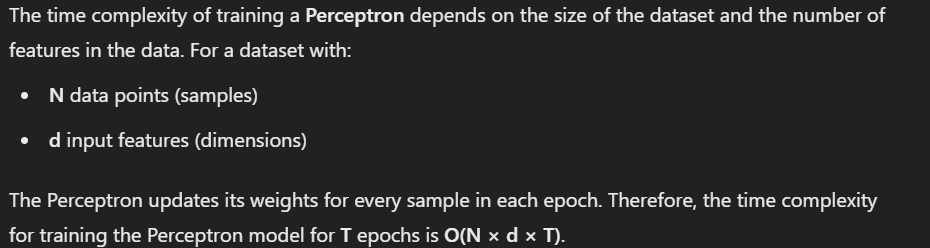

In [1]:
import numpy as np
import time
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Generate synthetic datasets with increasing sizes
sizes = [100, 1000, 5000, 10000, 20000]  # Different dataset sizes
times = []

# Loop through each dataset size and measure the time taken for training
for size in sizes:
    # Create a synthetic classification dataset
    X, y = make_classification(n_samples=size, n_features=20, n_informative=15, n_classes=2, random_state=42)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the perceptron model
    perceptron = Perceptron(max_iter=1000, random_state=42)

    # Measure the training time
    start_time = time.time()
    perceptron.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    times.append(training_time)
    print(f"Training time for dataset with {size} samples: {training_time:.4f} seconds")


Training time for dataset with 100 samples: 0.0113 seconds
Training time for dataset with 1000 samples: 0.0038 seconds
Training time for dataset with 5000 samples: 0.0151 seconds
Training time for dataset with 10000 samples: 0.0349 seconds
Training time for dataset with 20000 samples: 0.0814 seconds


## Step 2: Effect of Hyperparameters on Training Time


Training time is also influenced by hyperparameters such as number of epochs and batch size. By adjusting these parameters, we can see how they impact the overall time complexity.



In [7]:
# Vary the number of epochs and measure the time taken
epochs_list = [10, 100, 500, 10000, 20000, 50000]
size = 5000  # Fixed dataset size

for epochs in epochs_list:
    X, y = make_classification(n_samples=size, n_features=20, n_informative=15, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the perceptron model with varying epochs
    perceptron = Perceptron(max_iter=epochs, random_state=42)

    # Measure the training time
    start_time = time.time()
    perceptron.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time for {epochs} epochs: {training_time:.4f} seconds")


Training time for 10 epochs: 0.0079 seconds
Training time for 100 epochs: 0.0063 seconds
Training time for 500 epochs: 0.0058 seconds
Training time for 10000 epochs: 0.0057 seconds
Training time for 20000 epochs: 0.0057 seconds
Training time for 50000 epochs: 0.0058 seconds


### Observations on Epochs:

Number of Epochs:
  - Based on the above result:
    - The training times reported show that while increasing the number of epochs slightly reduces the time taken per epoch, this reduction quickly plateaus after around 500 epochs.
    - The minimal difference in training time across a wide range of epochs (from 500 to 50,000) suggests that the overhead or initialization may be contributing to the total time, and the computational efficiency per epoch remains nearly constant.
    - This behavior could imply that the model or system being used has reached an optimized level of performance, where the training process itself is streamlined, leading to consistent times as the number of epochs increases.
  
  - In general: As the number of epochs increases, the total training time grows linearly, as the Perceptron updates its weights on every epoch for every data point. With complexity O(N × d × T), doubling the number of epochs roughly doubles the training time.
Convergence Speed:
For smaller datasets, fewer epochs may be sufficient for convergence. However, larger datasets may require more epochs to ensure proper learning.

## Step 3: Comparing Perceptron’s Computational Efficiency with SVM, Decision Trees, and Deep Neural Networks


### SVM Complexity

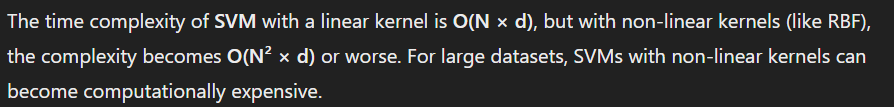

In [8]:
from sklearn.svm import SVC

# Measure SVM training time for comparison
for size in sizes:
    X, y = make_classification(n_samples=size, n_features=20, n_informative=15, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize SVM model
    svm_model = SVC(kernel='linear', max_iter=1000)

    # Measure the training time
    start_time = time.time()
    svm_model.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    print(f"SVM (Linear) training time for dataset with {size} samples: {training_time:.4f} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM (Linear) training time for dataset with 100 samples: 0.0180 seconds
SVM (Linear) training time for dataset with 1000 samples: 0.0276 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM (Linear) training time for dataset with 5000 samples: 0.2780 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM (Linear) training time for dataset with 10000 samples: 0.3440 seconds
SVM (Linear) training time for dataset with 20000 samples: 2.2827 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Decision Trees Complexity


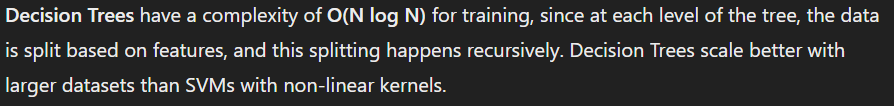

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Measure Decision Tree training time for comparison
for size in sizes:
    X, y = make_classification(n_samples=size, n_features=20, n_informative=15, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Decision Tree model
    tree_model = DecisionTreeClassifier(random_state=42)

    # Measure the training time
    start_time = time.time()
    tree_model.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    print(f"Decision Tree training time for dataset with {size} samples: {training_time:.4f} seconds")


Decision Tree training time for dataset with 100 samples: 0.0031 seconds
Decision Tree training time for dataset with 1000 samples: 0.0252 seconds
Decision Tree training time for dataset with 5000 samples: 0.2203 seconds
Decision Tree training time for dataset with 10000 samples: 0.4987 seconds
Decision Tree training time for dataset with 20000 samples: 0.9099 seconds


### Deep Neural Networks (DNNs) Complexity


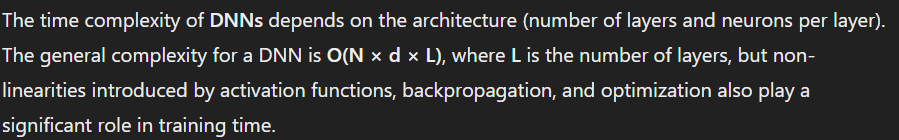

In [10]:
from sklearn.neural_network import MLPClassifier

# Measure DNN training time for comparison
for size in sizes:
    X, y = make_classification(n_samples=size, n_features=20, n_informative=15, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize a simple DNN model
    dnn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

    # Measure the training time
    start_time = time.time()
    dnn_model.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    print(f"DNN training time for dataset with {size} samples: {training_time:.4f} seconds")


DNN training time for dataset with 100 samples: 0.5504 seconds
DNN training time for dataset with 1000 samples: 3.3560 seconds
DNN training time for dataset with 5000 samples: 7.2463 seconds
DNN training time for dataset with 10000 samples: 20.5482 seconds
DNN training time for dataset with 20000 samples: 26.9660 seconds


## Observations on Computational Efficiency:

###Perceptron:

  - Simple Model, Low Complexity: The Perceptron has a relatively low time complexity of O(N × d × T), making it computationally efficient for linearly separable data.

  - It is much faster than more complex models like SVMs with non-linear kernels or DNNs but may not perform as well on non-linearly separable data.

###SVM (Linear Kernel):

  - Moderate Complexity: SVMs with a linear kernel have a similar complexity to the Perceptron but scale worse than Decision Trees for larger datasets. For non-linear kernels, the complexity increases to O(N²) or higher.

###Decision Trees:

  - Efficient for Larger Datasets: Decision Trees perform well on larger datasets with complexity O(N log N), making them faster than SVMs for large-scale problems.

###Deep Neural Networks:

  - High Complexity, Powerful Model: DNNs, while powerful, have high computational complexity. They take significantly longer to train compared to simpler models but can handle more complex, high-dimensional data efficiently.